<a href="https://colab.research.google.com/github/giuseppelaperna/Portfolio-Giuseppe-La-Perna-/blob/main/Progetto_Giuseppe_La_Perna__Segmentazione_della_clientela_di_un'azienda_di_servizi_finanziari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/giuseppelaperna/P/refs/heads/main/credit_card_customers.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.count()

,0
CUST_ID,8950
BALANCE,8950
BALANCE_FREQUENCY,8950
PURCHASES,8950
ONEOFF_PURCHASES,8950
INSTALLMENTS_PURCHASES,8950
CASH_ADVANCE,8950
PURCHASES_FREQUENCY,8950
ONEOFF_PURCHASES_FREQUENCY,8950
PURCHASES_INSTALLMENTS_FREQUENCY,8950


In [ ]:
df_imp = df.copy()
df_imp = df.drop("CUST_ID", axis=1)
df_imp.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Let's start with an analysis of our data, checking for any missing values.

In [ ]:
df_imp.isna().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [ ]:
df_imp.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


We have a null value for "credit_limit" and 313 missing values ​​for "minimum_payments". For the latter, I would suggest replacing them with the column mean.

In [ ]:
col = "MINIMUM_PAYMENTS"
col_2 = "CREDIT_LIMIT"
df_imp[col] = df_imp[col].fillna(df_imp[col].mean())
df_imp[col_2] = df_imp[col_2].fillna(df_imp[col_2].mean())
df_imp.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df_imp.isna().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [ ]:
df_norm = df_imp.copy()
features = df_norm.columns[0:]
df_norm[features] = (df_norm[features] - df_norm[features].min()) / (df_norm[features].max() - df_norm[features].min())
df_norm.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


Now that we have completed the normalization and all the features are on the same scale, we can start the required analysis.

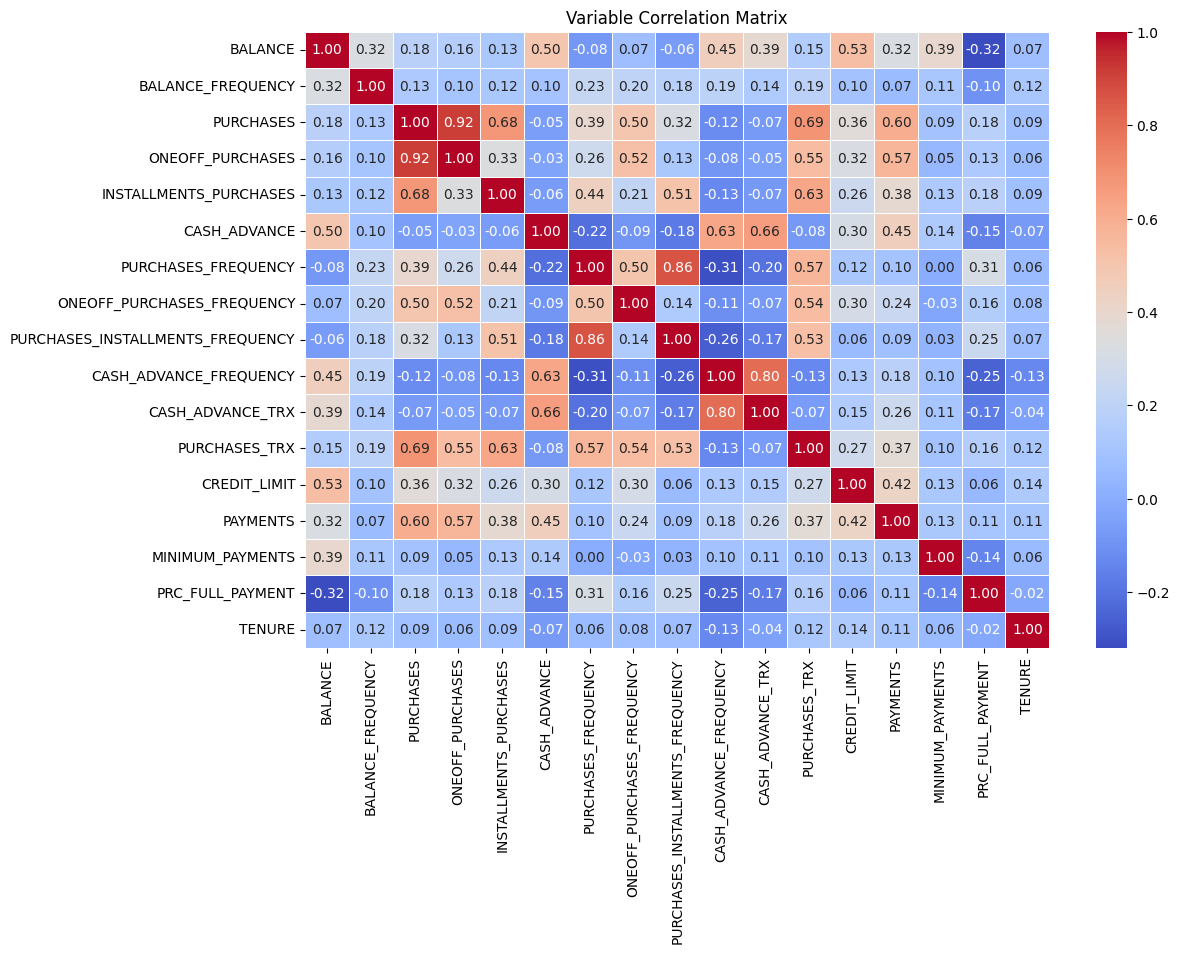

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Creating Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_imp.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Variable Correlation Matrix")
plt.show()



In [ ]:
RANDOM = 1

#Let's define the function for the ssd curve graph for choosing the number of clusters.
def plot_ssd_curve(X, k_range=(1, 10)):

  ssd = {}

  for k in range(k_range[0], k_range[1]):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=RANDOM)
    kmeans.fit(X)
    ssd[k] = kmeans.inertia_

  plt.plot(list(ssd.keys()), list(ssd.values()), marker="o")
  plt.xlabel("Number of cluster", fontsize=15)
  plt.ylabel("sum squared distance", fontsize=15)

  plt.show()

#Let's define the function to create the scatter plot of the clusters.
def plot_cluster(model, data, axlabels=None):

  centers = model.cluster_centers_
  y_kmeans = model.predict(data)
  plt.figure(figsize=(11,11))
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=y_kmeans, palette="Paired", s=100)
  plt.scatter(centers[:,0], centers[:,1], c="red", alpha=.8, s=200)

  if axlabels != None:
    plt.xlabel(axlabels[0], fontsize=15)
    plt.ylabel(axlabels[1], fontsize=15)

  plt.show()

Cluster division for BALANCE and  INSTALLMENTS_PURCHASES

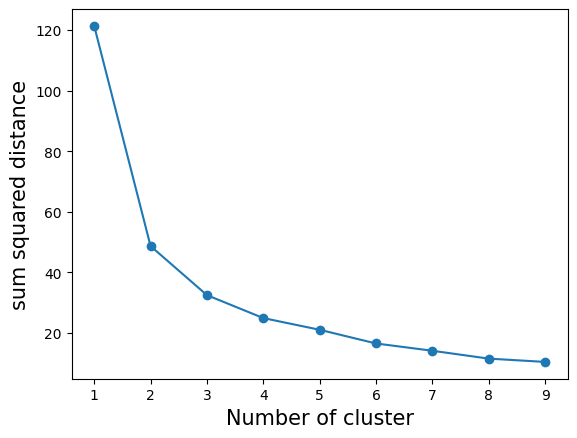

In [ ]:
X = df_norm[['BALANCE', 'INSTALLMENTS_PURCHASES']].values
plot_ssd_curve(X)

In [ ]:
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=RANDOM)
kmeans.fit(X)
kmeans.inertia_

24.915355085554783

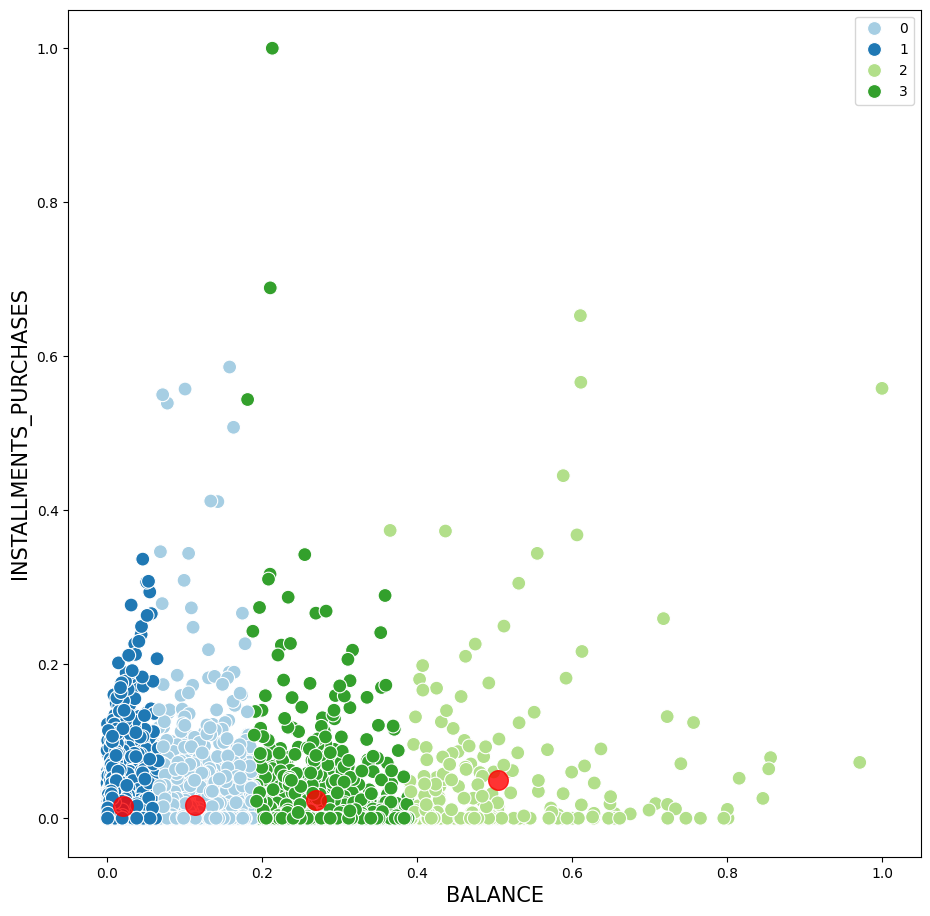

In [ ]:
plot_cluster(kmeans, X, axlabels=['BALANCE', 'INSTALLMENTS_PURCHASES'])

We have a subdivision into 4 clusters:

Cluster 0: Inactive customers with a low balance and few purchases; I recommend offering welcome promotions and cashback to encourage first purchases.

Cluster 2: Premium customers with a high balance and high purchases; I recommend creating VIP loyalty programs, offers on luxury products and exclusive services.

Cluster 1: Credit-sensitive customers with a low balance who only purchase in installments; I recommend offering financing with favorable rates and promotions on technology products.

Cluster 3: Conservative customers with a high balance but few purchases; I recommend offering investments, cashback on valuable purchases and benefits on premium credit cards.

Cluster division for CASH_ADVANCE and PURCHASES_FREQUENCY

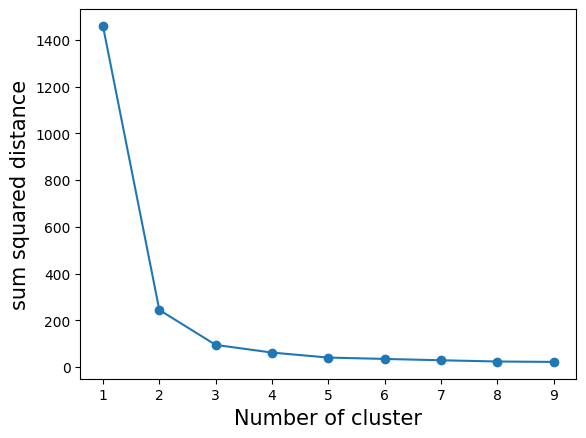

In [ ]:
X = df_norm[['CASH_ADVANCE', 'PURCHASES_FREQUENCY']].values
plot_ssd_curve(X)

In [ ]:
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=RANDOM)
kmeans.fit(X)
kmeans.inertia_

94.66344116728217

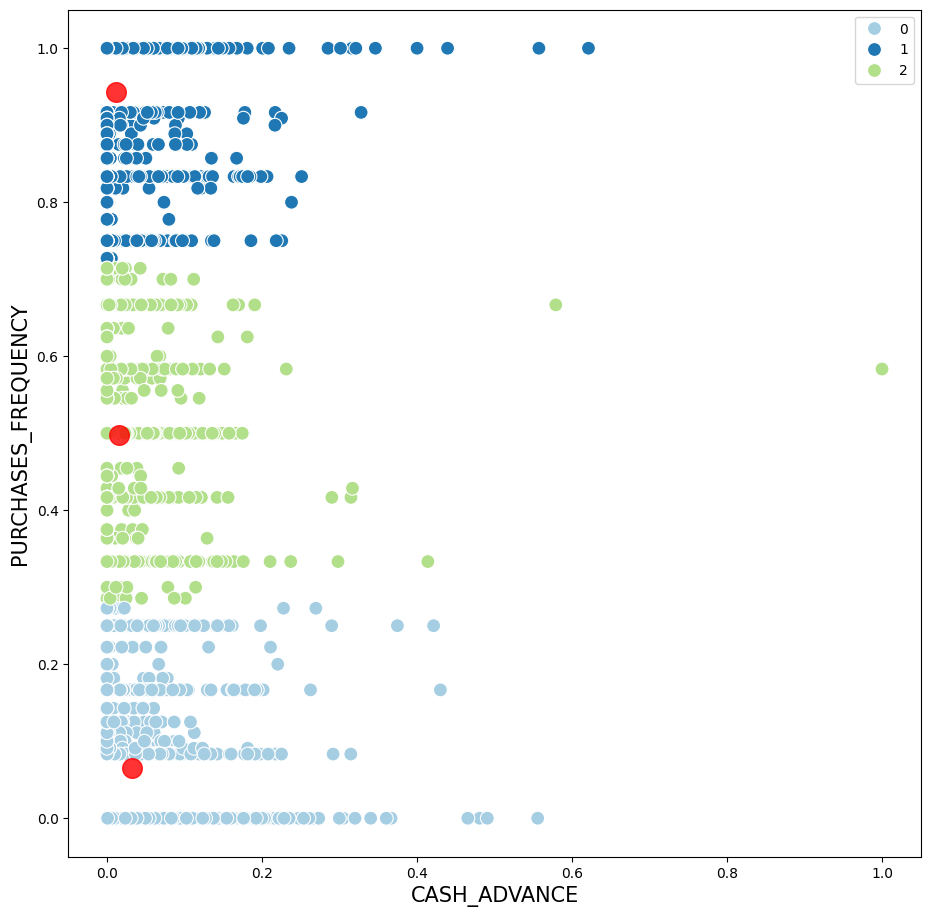

In [ ]:
plot_cluster(kmeans, X, axlabels=['CASH_ADVANCE', 'PURCHASES_FREQUENCY'])

We have a subdivision into 3 clusters:

Cluster 0: Less Active Customers: Rare purchases and few advances
I recommend welcome incentives and cashback to stimulate activity.

Cluster 1: Customers with High Advances: They often use the advance but make few purchases.
; I recommend offers on credit cards with preferential rates and increased credit limit.

Cluster 2: Frequent Customers: Regular purchases without using advances.
; I recommend loyalty programs and discounts on recurring purchases.

Cluster division for  MINIMUM_PAYMENTS and PRC_FULL_PAYMENTS

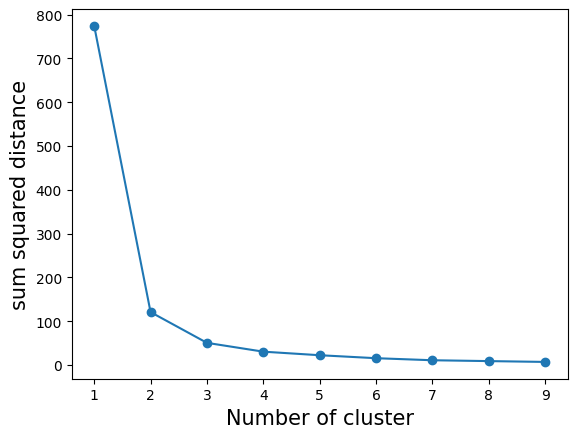

In [ ]:
X = df_norm[['MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']].values
plot_ssd_curve(X)

In [ ]:
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=RANDOM)
kmeans.fit(X)
kmeans.inertia_

30.2383762220559

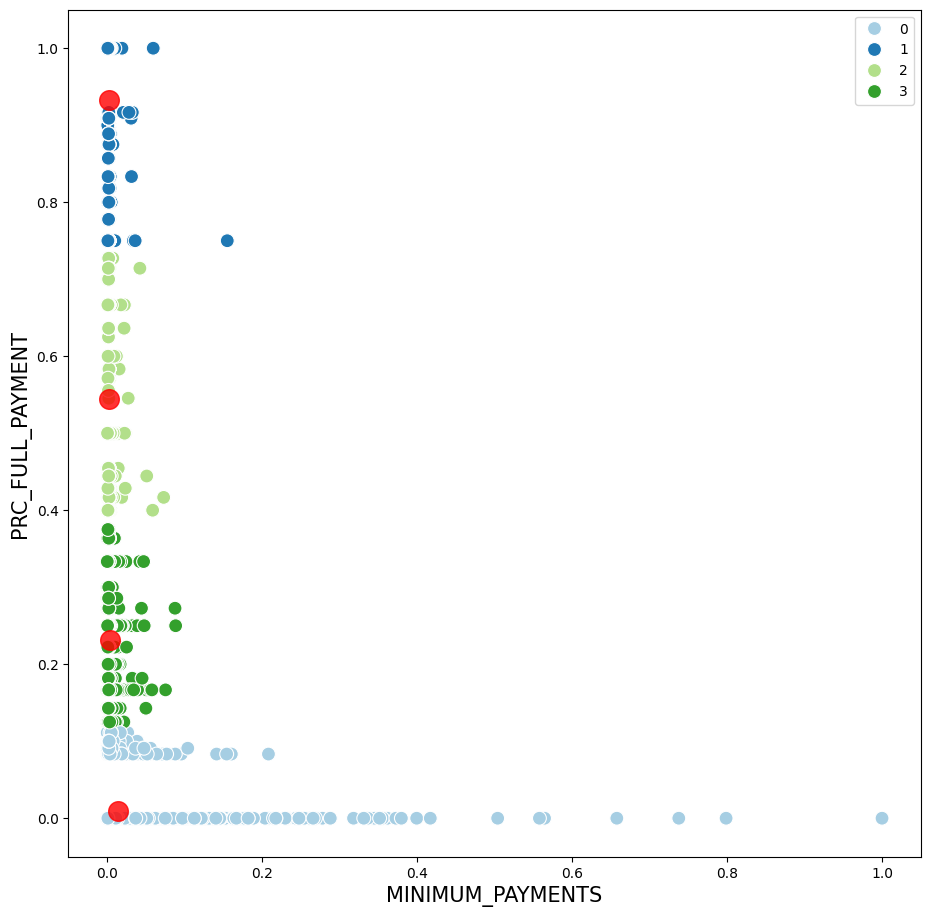

In [ ]:
plot_cluster(kmeans, X, axlabels=['MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'])

We have a subdivision into 4 clusters:

The fourth group includes customers with full but irregular payments, who may have fluctuating financial management; for this segment, it is advisable to offer personalized financial advice and rewards for regular payments.

The third group identifies customers with occasional payments and low minimum amounts; for this group, it is advisable to activate financial education campaigns, offer more flexible credit solutions, and incentives for punctual payments.

The second group is made up of customers who make constant minimum payments without ever paying the full amount; for these customers, it is advisable to offer installment payment plans with favorable rates and incentives to encourage full payment.

The first group of customers are those who make full and regular payments, representing the most reliable customers; for this segment, it is advisable to offer loyalty programs with rewards, credit cards with exclusive benefits, and personalized promotions.